In [14]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import numpy as np 
import geopandas as gpd
import matplotlib.pyplot as plt
from imview import pltlib
import pandas as pd
from pygeotools.lib import warplib,geolib,iolib,malib,filtlib,timelib
import os,sys,glob,shutil
from velocity_proc import glac_dyn, constants, velocity_filter,velocity_timeseries
import warnings
warnings.filterwarnings('ignore')

## Ngozumpa

In [3]:
%cd /nobackup/sbhusha1/chapter2/ngozumpa/20230217/

/nobackupp11/sbhusha1/chapter2/ngozumpa/20230217


In [4]:
constants.rgi_dicts['ngozumpa']

'RGI60-15.03473'

In [8]:
model1_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_1/RGI60-15/thickness_{constants.rgi_dicts['ngozumpa']}.tif"
model2_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_2/RGI60-15/thickness_{constants.rgi_dicts['ngozumpa']}.tif"
model3_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_3/RGI60-15/thickness_{constants.rgi_dicts['ngozumpa']}.tif"
model4_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_4/RGI60-15/thickness_{constants.rgi_dicts['ngozumpa']}.tif"

In [7]:
ls $model1_H_fn

/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_1/RGI60-15/thickness_RGI60-15.03473.tif


In [30]:


vx_fn = '20121223_combined_hs__20150115_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20121223_combined_hs__20150115_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip.tif'
vy_fn = '20121223_combined_hs__20150115_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20121223_combined_hs__20150115_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_gauss_fill51px_shpclip.tif'

glac_shp = gpd.read_file(constants.fetch_glac_shp(constants.rgi_dicts['ngozumpa'])).to_crs("EPSG:32645")
H_fn = constants.fetch_farinotti_thickness('ngozumpa')
millan_H_fn = constants.fetch_milan_thickness('ngozumpa')
ds_list = warplib.memwarp_multi_fn([H_fn,model1_H_fn,model2_H_fn,model3_H_fn,model4_H_fn,millan_H_fn,vx_fn,vy_fn])
H,model1,model2,model3,model4,millan_H,vx,vy = [iolib.ds_getma(ds) for ds in ds_list]


Warping all inputs to the following:
Resolution: 50.0
Extent: [466274.4133155726, 3090019.828355965, 476674.4133155726, 3104071.0]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 8: /nobackup/sbhusha1/hma/ngozumpa_lagdz/icethickness/RGI60-15/RGI60-15.03473_thickness.tif
nl: 281 ns: 208 res: 50.000
100 - done.
0...10...20...30...40...50...60...70...80...90...2 of 8: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_1/RGI60-15/thickness_RGI60-15.03473.tif
nl: 281 ns: 208 res: 50.000
100 - done.
0...10...20...30...40...50...60...70...80...90...3 of 8: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_2/RGI60-15/thickness_RGI60-15.03473.tif
nl: 281 ns: 208 res: 50.000
100 - done.
0...10...20...30...40...50...60...70...80...90...4 of 8: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_3/RGI60-15/thickness_RGI60-15.03473.tif
nl: 281 ns: 208 res: 50.000
100 - do

In [31]:
res = geolib.get_res(ds_list[0])[0]
flux_models = [glac_dyn.compute_simple_flux_div(vx,vy,m_H,dx=res,dy=res,smooth=False) for m_H in [H,model1,model2,model3,model4,millan_H]]

<Axes: >

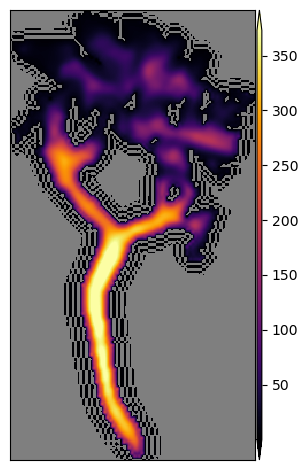

In [28]:
f,ax = plt.subplots()
pltlib.iv(iolib.fn_getma(model3_H_fn),ax=ax,cmap='inferno')
## something is weird with the model 3 values

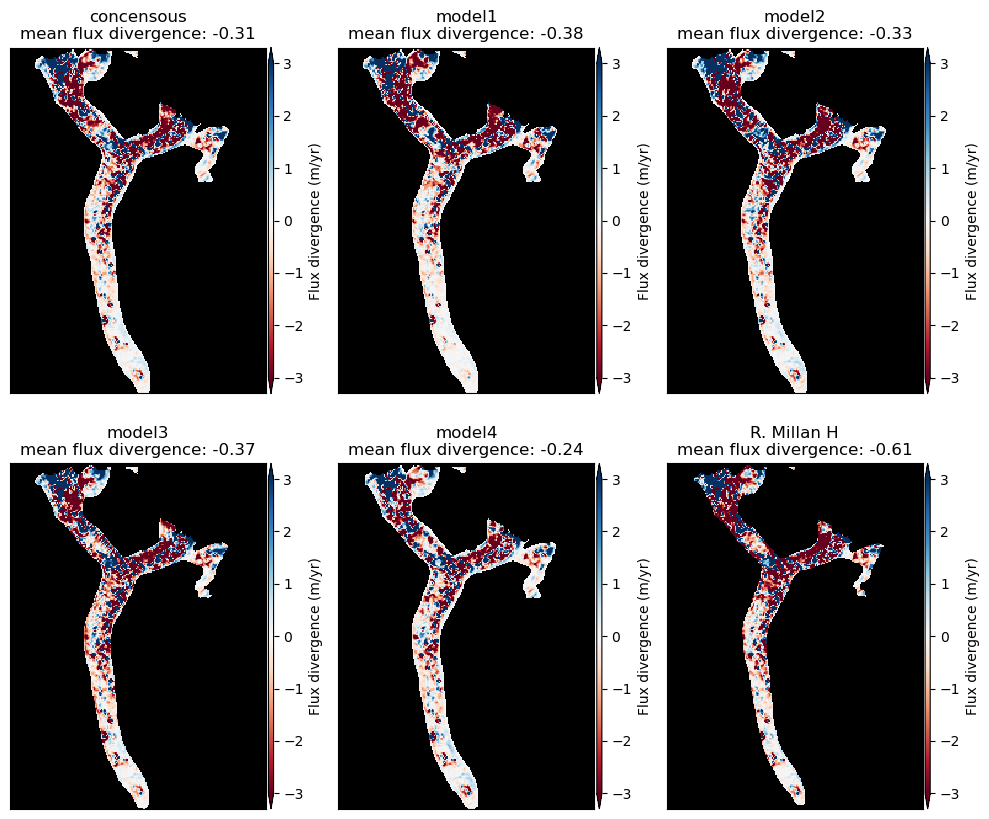

In [33]:
f,ax = plt.subplots(2,3,figsize=(10,10))
axa = ax.ravel()
models_title = ['concensous','model1','model2','model3','model4','R. Millan H']
cmap = 'RdBu'
clim = (-3,3)
label = 'Flux divergence (m/yr)'
for idx,flux in enumerate(flux_models):
    if idx == 3:
        flux = velocity_timeseries.mask_by_shp(glac_shp.geometry,flux,ds=ds_list[0])
    mean = flux.mean()
    plt_title = f"{models_title[idx]}\nmean flux divergence: {mean :.2f}"
    pltlib.iv(flux,ax=axa[idx],cmap=cmap,clim=clim,label=label,title=plt_title)


## Langtang

In [34]:
%cd /nobackup/sbhusha1/chapter2/langtang/20230223/

/nobackupp11/sbhusha1/chapter2/langtang/20230223


In [35]:
glac_name = 'langtang'
model1_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_1/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model2_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_2/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model3_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_3/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model4_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_4/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"

In [36]:


vx_fn = '20150222_combined_hs__20160107_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20150222_combined_hs__20160107_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip.tif'
vy_fn = '20150222_combined_hs__20160107_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20150222_combined_hs__20160107_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_gauss_fill51px_shpclip.tif'
glac_shp = gpd.read_file(constants.fetch_glac_shp(constants.rgi_dicts[glac_name])).to_crs("EPSG:32645")
H_fn = constants.fetch_farinotti_thickness(glac_name)
millan_H_fn = constants.fetch_milan_thickness(glac_name)
ds_list = warplib.memwarp_multi_fn([H_fn,model1_H_fn,model2_H_fn,model3_H_fn,model4_H_fn,millan_H_fn,vx_fn,vy_fn])
H,model1,model2,model3,model4,millan_H,vx,vy = [iolib.ds_getma(ds) for ds in ds_list]


Warping all inputs to the following:
Resolution: 25.0
Extent: [368152.4907537196, 3121787.692687901, 375921.0, 3139887.692687901]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 8: /nobackup/sbhusha1/hma/ngozumpa_lagdz/icethickness/RGI60-15/RGI60-15.04121_thickness.tif
nl: 724 ns: 311 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...2 of 8: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_1/RGI60-15/thickness_RGI60-15.04121.tif
nl: 724 ns: 311 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...3 of 8: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_2/RGI60-15/thickness_RGI60-15.04121.tif
nl: 724 ns: 311 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...4 of 8: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_3/RGI60-15/thickness_RGI60-15.04121.tif
nl: 724 ns: 311 res: 25.000
100 - don

In [37]:
res = geolib.get_res(ds_list[0])[0]
flux_models = [glac_dyn.compute_simple_flux_div(vx,vy,m_H,dx=res,dy=res,smooth=False) for m_H in [H,model1,model2,model3,model4,millan_H]]

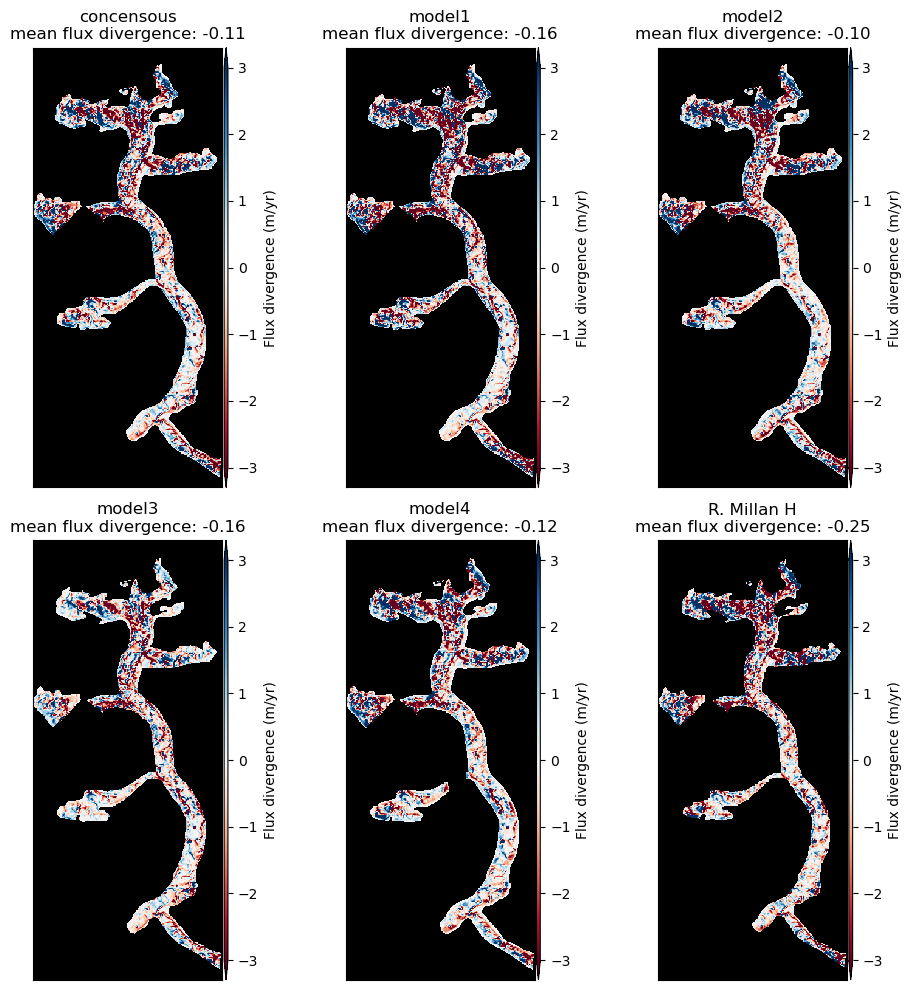

In [38]:
f,ax = plt.subplots(2,3,figsize=(10,10))
axa = ax.ravel()
models_title = ['concensous','model1','model2','model3','model4','R. Millan H']
cmap = 'RdBu'
clim = (-3,3)
label = 'Flux divergence (m/yr)'
for idx,flux in enumerate(flux_models):
    if idx == 3:
        flux = velocity_timeseries.mask_by_shp(glac_shp.geometry,flux,ds=ds_list[0])
    mean = flux.mean()
    plt_title = f"{models_title[idx]}\nmean flux divergence: {mean :.2f}"
    pltlib.iv(flux,ax=axa[idx],cmap=cmap,clim=clim,label=label,title=plt_title)


## Imja Lhotse Shar

In [39]:
%cd /nobackup/sbhusha1/chapter2/imja/20230223/

/nobackupp11/sbhusha1/chapter2/imja/20230223


In [40]:
glac_name = 'imja'
model1_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_1/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model2_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_2/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model3_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_3/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model4_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_4/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"

In [42]:


vx_fn = '20151002_combined_hs_masked__20161029_combined_hs_masked_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20151002_combined_hs_masked__20161029_combined_hs_masked_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip.tif'
vy_fn = '20151002_combined_hs_masked__20161029_combined_hs_masked_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20151002_combined_hs_masked__20161029_combined_hs_masked_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_gauss_fill51px_shpclip.tif'
glac_shp = gpd.read_file(constants.fetch_glac_shp(constants.rgi_dicts[glac_name])).to_crs("EPSG:32645")
H_fn = constants.fetch_farinotti_thickness(glac_name)
millan_H_fn = constants.fetch_milan_thickness(glac_name)
ds_list = warplib.memwarp_multi_fn([H_fn,model1_H_fn,model2_H_fn,model3_H_fn,model4_H_fn,millan_H_fn,vx_fn,vy_fn])
H,model1,model2,model3,model4,millan_H,vx,vy = [iolib.ds_getma(ds) for ds in ds_list]


Warping all inputs to the following:
Resolution: 25.0
Extent: [493021.6517065081, 3084915.0, 498271.6517065081, 3092413.221770468]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 8: /nobackup/sbhusha1/hma/ngozumpa_lagdz/icethickness/RGI60-15/RGI60-15.03743_thickness.tif
nl: 300 ns: 210 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...2 of 8: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_1/RGI60-15/thickness_RGI60-15.03743.tif
nl: 300 ns: 210 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...3 of 8: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_2/RGI60-15/thickness_RGI60-15.03743.tif
nl: 300 ns: 210 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...4 of 8: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_3/RGI60-15/thickness_RGI60-15.03743.tif
nl: 300 ns: 210 res: 25.000
100 - do

In [43]:
res = geolib.get_res(ds_list[0])[0]
flux_models = [glac_dyn.compute_simple_flux_div(vx,vy,m_H,dx=res,dy=res,smooth=False) for m_H in [H,model1,model2,model3,model4,millan_H]]

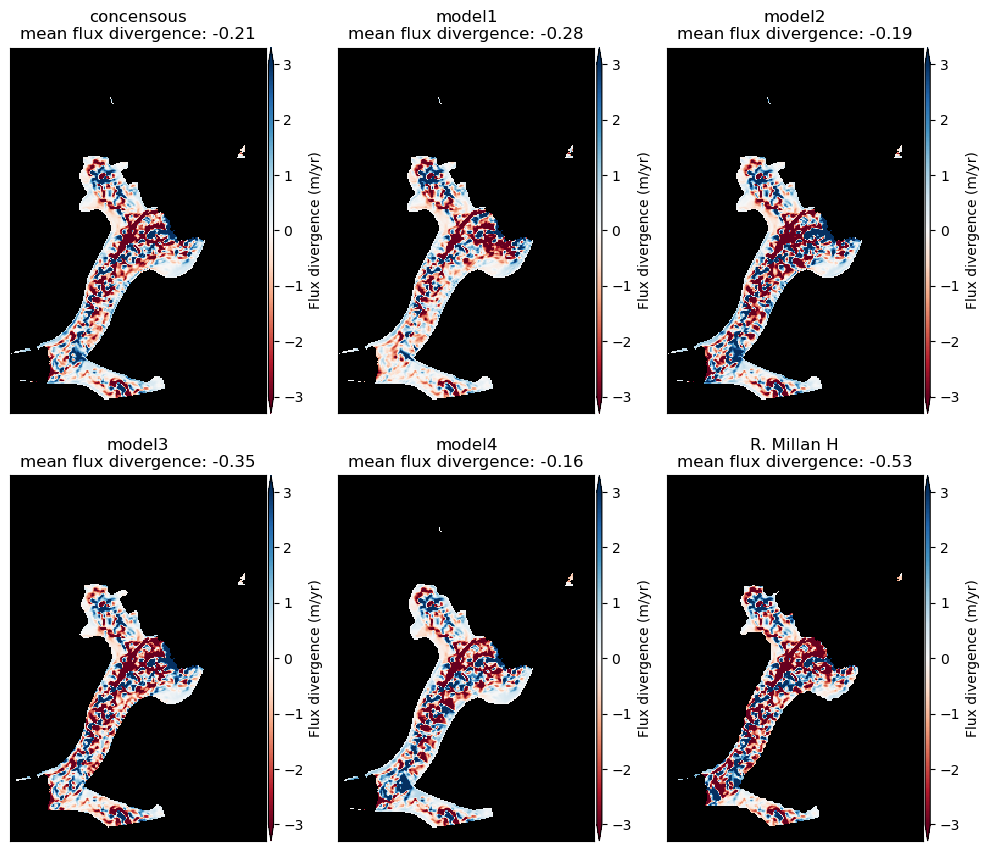

In [44]:
f,ax = plt.subplots(2,3,figsize=(10,10))
axa = ax.ravel()
models_title = ['concensous','model1','model2','model3','model4','R. Millan H']
cmap = 'RdBu'
clim = (-3,3)
label = 'Flux divergence (m/yr)'
for idx,flux in enumerate(flux_models):
    if idx == 3:
        flux = velocity_timeseries.mask_by_shp(glac_shp.geometry,flux,ds=ds_list[0])
    mean = flux.mean()
    plt_title = f"{models_title[idx]}\nmean flux divergence: {mean :.2f}"
    pltlib.iv(flux,ax=axa[idx],cmap=cmap,clim=clim,label=label,title=plt_title)


## Khumbu

In [45]:
%cd /nobackup/sbhusha1/chapter2/changrinup/20230217/

/nobackupp11/sbhusha1/chapter2/changrinup/20230217


In [46]:
glac_name = 'khumbu'
model1_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_1/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model2_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_2/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model3_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_3/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model4_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_4/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"

In [47]:


vx_fn = '20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip.tif'
vy_fn = '20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_gauss_fill51px_shpclip.tif'
glac_shp = gpd.read_file(constants.fetch_glac_shp(constants.rgi_dicts[glac_name])).to_crs("EPSG:32645")
H_fn = constants.fetch_farinotti_thickness(glac_name)
millan_H_fn = constants.fetch_milan_thickness(glac_name)
ds_list = warplib.memwarp_multi_fn([H_fn,model1_H_fn,model2_H_fn,model3_H_fn,model4_H_fn,millan_H_fn,vx_fn,vy_fn])
H,model1,model2,model3,model4,millan_H,vx,vy = [iolib.ds_getma(ds) for ds in ds_list]

thickness file does not exist, will create one
Raster to clip: /nobackupp11/sbhusha1/hma/lagdz_samples/romain_thickness/RGI-13-15/THICKNESS_RGI-13-15.3_2022February10.tif
Shapefile used to clip: /nobackup/sbhusha1/reference_data/lagdz_shp_fn/RGI60-15.03733_shp.gpkg
nl: 187 ns: 223 res: 50.000
100 - done.
0...10...20...30...40...50...60...70...80...90...Input shp srs: +proj=aea +lat_0=36 +lon_0=85 +lat_1=25 +lat_2=47 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs
Specified output srs: +proj=utm +zone=45 +datum=WGS84 +units=m +no_defs

Warping all inputs to the following:
Resolution: 25.0
Extent: [481573.7298609848, 3090517.0, 488435.0, 3099608.9163055387]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 8: /nobackup/sbhusha1/hma/ngozumpa_lagdz/icethickness/RGI60-15/RGI60-15.03733_thickness.tif
nl: 364 ns: 274 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...2 of 8: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/indi

In [48]:
res = geolib.get_res(ds_list[0])[0]
flux_models = [glac_dyn.compute_simple_flux_div(vx,vy,m_H,dx=res,dy=res,smooth=False) for m_H in [H,model1,model2,model3,model4,millan_H]]

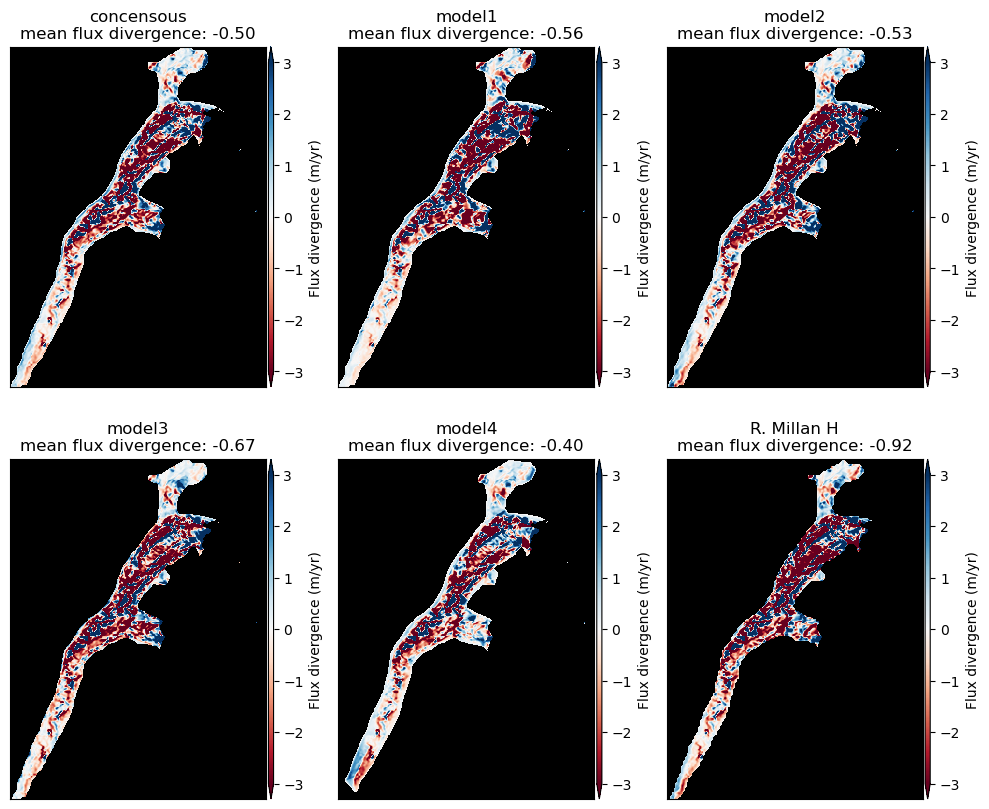

In [49]:
f,ax = plt.subplots(2,3,figsize=(10,10))
axa = ax.ravel()
models_title = ['concensous','model1','model2','model3','model4','R. Millan H']
cmap = 'RdBu'
clim = (-3,3)
label = 'Flux divergence (m/yr)'
for idx,flux in enumerate(flux_models):
    if idx == 3:
        flux = velocity_timeseries.mask_by_shp(glac_shp.geometry,flux,ds=ds_list[0])
    mean = flux.mean()
    plt_title = f"{models_title[idx]}\nmean flux divergence: {mean :.2f}"
    pltlib.iv(flux,ax=axa[idx],cmap=cmap,clim=clim,label=label,title=plt_title)
